# Coding Dojo Working Notebook: Plotting Jet Kinematic Variables

## Jet Basics
<!-- Quick explanation of what jets are and any other relevant information about them -->

## Setup

If you do not already have the data, go back to your terminal and do so. (Hint: Look up what `wget` does and how it works.)

## Instructions
For AK4 jets, plot histograms for each of the kinematic variables using the tools specified in the following table.

<table>
  <tr>
    <th>AK4 Jet Kinematic Variable</th>
    <th>Tools to Plot With</th>
  </tr>
  <tr>
    <td>Jet eta</td>
    <td>PyROOT</td>
  </tr>
  <tr>
    <td>Jet pt</td>
    <td>RDataFrame</td>
  </tr>
  <tr>
    <td>Jet phi</td>
    <td>Uproot, Hist</td>
  </tr>
  <tr>
    <td>Jet mass</td>
    <td>Matplotlib</td>
  </tr>
</table>

If you finish before time is up, there is an extra exercise

## Hints:
1. Check the content of data.root (e.g. What is the name of the TTree?)
    - The file contains multipe TTrees
    - Only the **first** one is relavent to this exercise
2. Check the content of TTree (e.g. What branches does TTree have? What is the branch name of the quantity that we want to plot?)
3. Fill a histogram using the branch and draw

In [ ]:
# check the content of data.root
!rootls data.root

## `PyROOT` for AK4 Jet $\eta$

In [17]:
import ROOT

### Read the ROOT File

In [18]:
file = ROOT.TFile.Open("data.root")

### Load the "Events" Tree from the ROOT file

In [19]:
tree = file.Get("Events")

In [15]:
tree.Print()

******************************************************************************
*Tree    :Events    : Events                                                 *
*Entries :   107505 : Total =       604094767 bytes  File  Size =  138372690 *
*        :          : Tree compression factor =   4.36                       *
******************************************************************************
*Br    0 :run       : run/i                                                  *
*Entries :   107505 : Total  Size=     431973 bytes  File Size  =       3722 *
*Baskets :       18 : Basket Size=      26624 bytes  Compression= 115.88     *
*............................................................................*
*Br    1 :luminosityBlock : luminosityBlock/i                                *
*Entries :   107505 : Total  Size=     432237 bytes  File Size  =       4054 *
*Baskets :       18 : Basket Size=      26624 bytes  Compression= 106.45     *
*...................................................

### Create a canvas to plot the Histogram

In [30]:
canvas = ROOT.TCanvas("canvas", "Jet_eta", 800, 600)

### Create an empty Histogram to plot the AK4 Jet $\eta$ 
Requirement: Range from -6 to 6. Split into 100 bins.

In [20]:
hist = ROOT.TH1F("Jet #eta", "Jet #eta", 100, -6, 6)

### Fill the histogram with the branch in TTree

The code has been written for you.

Read the code and explain what each line is doing with the help of the documentation: https://root.cern.ch/doc/master/classTTree.html



Write it down in this cell (double click to edit) or leave comments in the code:

In [28]:
nEntries = tree.GetEntries()

for i in range(nEntries):
    if(tree.GetEntry(i)>0):
        for j in range(len(tree.Jet_eta)): # Loop through all the jets in each event
             hist.Fill(tree.Jet_eta[j])

### Draw the Histogram and the Canvas

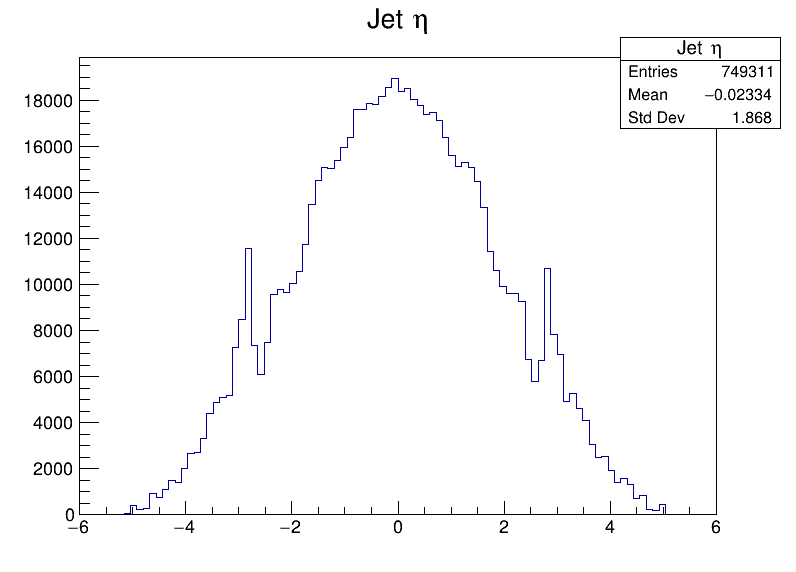

In [31]:
hist.Draw()
canvas.Draw()

You will find that looping through every event to fill the histogram is slow.

Here is a cool shortcut that replaces everything above:

In [ ]:
tree.Draw("Jet_eta >> Jet #eta")
canvas.Draw()

## `RDataFrame` for AK4 Jet $\phi$

**To-do**: Plot the distribution of jet $\phi$

**Requirement**: the histogram should range from -2 to 2 and have 10 bins

**Documentation** of relavent functions: https://root.cern/doc/master/classROOT_1_1RDataFrame.html

Import relavent package (hint: ROOT)

In [ ]:
import ROOT

Load TTree into a RDataFrame (aka create a RDataFrame with the content in TTree)

In [ ]:
df = ROOT.RDataFrame("Events","data.root")

Check the column names

In [ ]:
print(df.GetColumnNames())

Fill a histogram with the desired branch
Requirement: the histogram should range from -2 to 2 and have 10 bins

In [ ]:
h_phi = df.Histo1D(("Jet #phi", "Jet #phi", 10, -2, 2), "Jet_phi")

Plot histogram

In [ ]:
c = ROOT.TCanvas()
h_phi.Draw()
c.Draw()

## `Hist` for AK4 Jet $p_T$

In [ ]:
import uproot, hist, awkward

## `Matplotlib` for AK4 Jet mass

In [ ]:
import matplotlib.pyplot as plt
import numpy as np